In [ ]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm # Gera barras de progresso durante a execução de algumas funções
from matplotlib import pyplot as plt
import tensorflow
import random 
from glob import glob
from imageio import mimread

In [ ]:
seed = 42
np.random.seed = seed
random.seed = seed
tensorflow.random.set_seed(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/datasets/drive_dataset.zip /content/

In [ ]:
!unzip drive_dataset.zip -d /content/

Archive:  drive_dataset.zip
 extracting: /content/drive_dataset/test.zip  
 extracting: /content/drive_dataset/training.zip  


In [ ]:
!unzip /content/drive_dataset/training.zip -d /content/drive_dataset/
!unzip /content/drive_dataset/test.zip -d /content/drive_dataset/

Archive:  /content/drive_dataset/training.zip
   creating: /content/drive_dataset/training/1st_manual/
 extracting: /content/drive_dataset/training/1st_manual/21_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/22_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/23_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/24_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/25_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/26_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/27_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/28_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/29_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/30_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/31_manual1.gif  
 extracting: /content/drive_dataset/training/1st_manual/32_manual1.gif  
 extracting: /content

In [ ]:
def carregar_dataset(caminho):
  X_train = sorted(glob(os.path.join(caminho, "training", "images", "**.tif")))
  y_train = sorted(glob(os.path.join(caminho, "training", "1st_manual", "**.gif")))
  
  X_test = sorted(glob(os.path.join(caminho, "test", "images", "**.tif")))
  y_test = sorted(glob(os.path.join(caminho, "test", "1st_manual", "**.gif")))

  return (X_train, y_train), (X_test, y_test)

In [ ]:
path_dataset = "drive_dataset"
(X_train, y_train), (X_test, y_test) = carregar_dataset(path_dataset)

In [ ]:
len(X_train), len(y_train)

(20, 20)

In [ ]:
len(X_test), len(y_test)

(20, 20)

In [ ]:
img = mimread(y_train[0])[0]

In [ ]:
print('>>' + str(img))

>>[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Data Augmentation**

Busca aumentar a quantidade de imagens do dataset.

Usada para criar novas imagens a partir de imagens já existentes

Biblioteca que pode ser utilizada: Albumentation. Aa instalá-la no colab não reiniciar o ambiente.

In [ ]:
altura = 512
largura = 512

In [ ]:
!pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-w62l_72t
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-w62l_72t
     |████████████████████████████████| 47.8 MB 2.0 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=112723 sha256=51e779f3cceed326f7e0e3bb6d66af009ebe75a638b7f1732a9cccdef3ea2e16
  Stored in directory: /tmp/pip-ephem-wheel-cache-jw_gsamc/wheels/3a/25/ed/ec3b518e7a332d7f0a3bb37c280e1b784cf2f79b94b3c7d00b
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


- HorizontalFlip: Espelha a imagem horizontalmente;
- VerticalFlip: Espelha a imagem verticalmente;
- OpticalDistortion: Distorções ópticas, imitam distorções causadas por lentos fotograficas;
- ElasticTransform: Distorções na estrutura da imagem;
- GridDistorcion: Distorções na grade da imagem.

In [ ]:
from albumentations import HorizontalFlip, VerticalFlip, ElasticTransform, GridDistortion, OpticalDistortion, CoarseDropout

In [ ]:
def criar_diretorio(caminho):
  if not os.path.exists(caminho):
    os.makedirs(caminho)

In [ ]:
criar_diretorio('dataset_final/train/images')
criar_diretorio('dataset_final/train/mask')

criar_diretorio('dataset_final/test/images')
criar_diretorio('dataset_final/test/mask')

In [ ]:
import imageio as io

In [ ]:
def novas_imagens(imagens, mascaras, dir_salvar, altura = 512, largura = 512, augmentation = True):
  for idx, (x, y) in tqdm(enumerate(zip(imagens, mascaras)), total = len(imagens)):
    nome = x.split('/')[-1].split('.')[0]

    x = cv2.imread(x)
    y = io.mimread(y)[0] # Lendo imagens com a extensão .gif

    if augmentation:
      aug = HorizontalFlip(p = 1.0) # Probabilidade de aplicar a transformação
      augmentation = aug(image = x, mask = y)
      x1 = augmentation['image']
      y1 = augmentation['mask']

      aug = VerticalFlip(p = 1.0) # Probabilidade de aplicar a transformação
      augmentation = aug(image = x, mask = y)
      x2 = augmentation['image']
      y2 = augmentation['mask']

      aug = OpticalDistortion(p = 1.0 # Probabilidade de aplicar a transformação
                              , distort_limit=2 # Limite da distorção
                              , shift_limit = 0.5 # faixa das distorções
                              ) 
      augmentation = aug(image = x, mask = y)
      x3 = augmentation['image']
      y3 = augmentation['mask']

      aug = ElasticTransform(p = 1.0 # Probabilidade de aplicar a transformação
                              , alpha = 120 
                              , sigma = 120 * 0.05
                              , alpha_affine = 120 * 0.03) 
      augmentation = aug(image = x, mask = y)
      x4 = augmentation['image']
      y4 = augmentation['mask']


      aug = GridDistortion(p = 1.0)
      augmentation = aug(image = x, mask = y)
      x5 = augmentation['image']
      y5 = augmentation['mask']

      X = [x, x1, x2, x3, x4, x5]
      y = [y, y1, y2, y3, y4, y5]
    else:
      X = [x]
      y = [y]

    indice = 0
    for img, mask in zip(X, y):

      img = cv2.resize(img, (largura, altura))
      mask = cv2.resize(mask, (largura, altura))


      if len(X) == 1:
        tmp_img_nome = f'{nome}.png'
        tmp_mask_nome = f'{nome}.png'
      else:
        tmp_img_nome = f'{nome}_{indice}.png'
        tmp_mask_nome = f'{nome}_{indice}.png'

      path_imagem = os.path.join(dir_salvar, 'images', tmp_img_nome)
      path_mascara = os.path.join(dir_salvar, 'mask', tmp_mask_nome)

      cv2.imwrite(path_imagem, img)
      cv2.imwrite(path_mascara, mask)
      
      indice += 1
      

In [ ]:
novas_imagens(X_train, y_train, '/content/dataset_final/train/', augmentation = True)

100%|██████████| 20/20 [00:11<00:00,  1.75it/s]


In [ ]:
novas_imagens(X_test, y_test, '/content/dataset_final/test/', augmentation = False)

100%|██████████| 20/20 [00:00<00:00, 33.90it/s]


In [ ]:
dir_geradas_train = '/content/dataset_final/train/'

imgs_geradas = [os.path.join(dir_geradas_train + 'images', f) for f in os.listdir(dir_geradas_train + 'images')]
masks_geradas = [os.path.join(dir_geradas_train + 'mask', f) for f in os.listdir(dir_geradas_train + 'mask')]

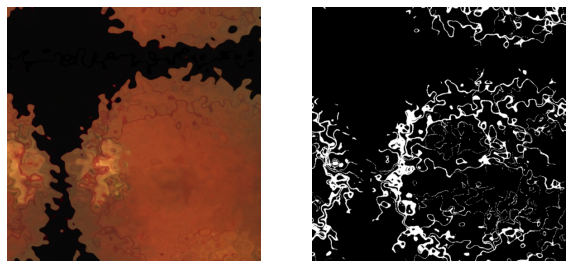

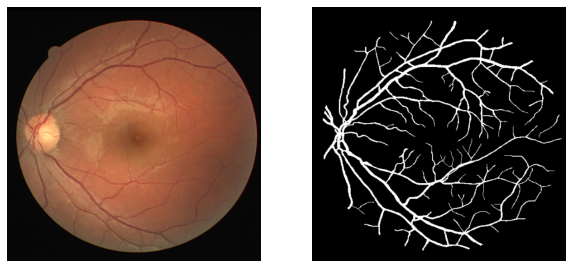

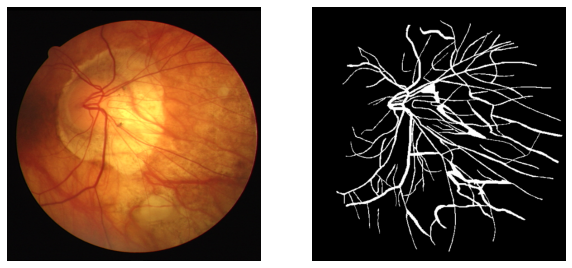

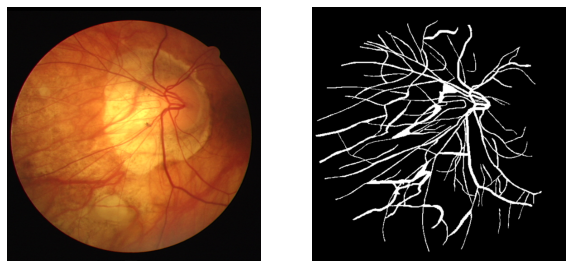

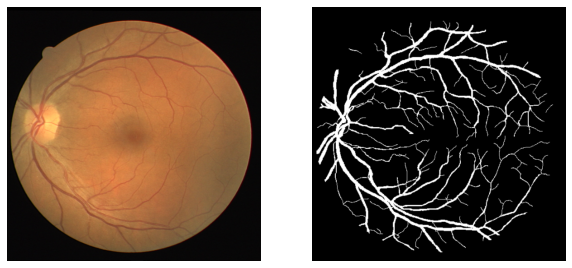

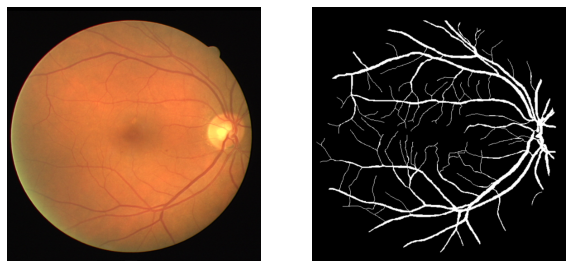

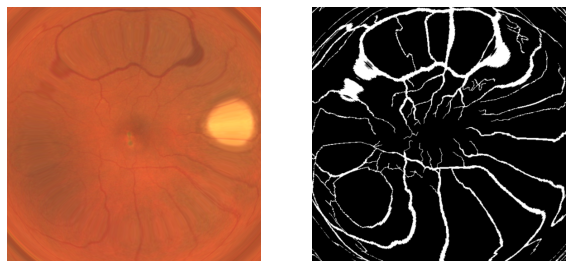

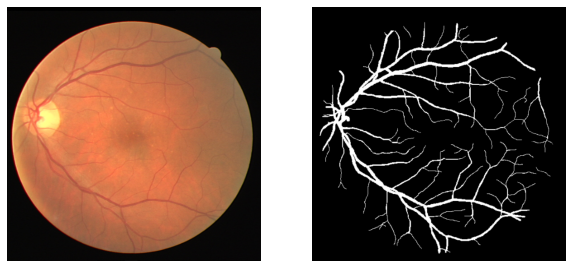

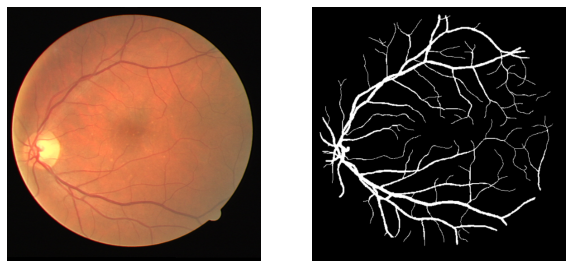

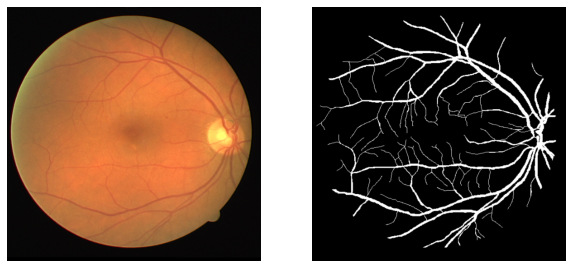

In [ ]:
for i in range(10):
  fig = plt.figure(figsize = (10,7))

  fig.add_subplot(1,2,1)
  img_teste = cv2.imread(imgs_geradas[i])
  plt.imshow(cv2.cvtColor(img_teste, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  fig.add_subplot(1,2,2)
  mask_teste = cv2.imread(masks_geradas[i])
  plt.imshow(cv2.cvtColor(mask_teste, cv2.COLOR_BGR2RGB))
  plt.axis('off')

**Construção da rede U-Net**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, MaxPool2D, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.metrics import Recall, Precision

In [ ]:
def bloco_conv(input, num_filtros):
  x = Conv2D(num_filtros, 3, padding = 'same')(input)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(num_filtros, 3, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  return x

# Encoder - convolução > MaxPooling
def bloco_encoder(input, num_filtros):
  x = bloco_conv(input, num_filtros)
  p = MaxPool2D((2, 2))(x)
  return x, p

# Decoder
def bloco_decoder(input, skip_features, num_filtros):
  x = Conv2DTranspose(num_filtros, (2,2), strides = 2, padding = 'same')(input)
  x = Concatenate()([x, skip_features])
  x = bloco_conv(x, num_filtros)
  return x

# União dos métodos
def modelo_unet(input_shape):
  inputs = Input(input_shape)

  s1, p1 = bloco_encoder(inputs, 64)
  s2, p2 = bloco_encoder(p1, 128)
  s3, p3 = bloco_encoder(p2, 256)
  s4, p4 = bloco_encoder(p3, 512)

  b1 = bloco_conv(p4, 1024)

  d1 = bloco_decoder(b1, s4, 512)
  d2 = bloco_decoder(d1, s3, 256)
  d3 = bloco_decoder(d2, s2, 128)
  d4 = bloco_decoder(d3, s1, 64)

  outputs = Conv2D(1, 1, padding = 'same', activation='sigmoid')(d4)

  model = Model(inputs, outputs, name = 'Unet')

  return model

In [ ]:
from keras import backend as K

# IoU
def iou (y_true, y_pred, smooth = 1):
  intersecao = K.sum(K.abs(y_true * y_pred), axis = [1, 2, 3])
  uniao = K.sum(y_true, axis = [1, 2, 3]) + K.sum(y_pred, axis = [1, 2, 3]) - intersecao
  iou = K.mean((intersecao + smooth) / (uniao + smooth), axis = 0)
  return iou

# Coeficiente Dice
def dice_coef(y_true, y_pred, smooth = 1):
  intersecao = K.sum(y_true * y_pred, axis = [1,2,3])
  uniao = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis = [1,2,3])
  return K.mean((2. * intersecao + smooth) / (uniao + smooth), axis = 0)

def dice_coef_loss(y_true, y_pred):
  return 1 - dice_coef(y_true, y_pred)

In [ ]:
epochs = 50
batch_size = 2
lr = 1e-4 # Taxa de aprendizagem

In [ ]:
model = modelo_unet((altura, largura, 3))
model.compile(loss=dice_coef_loss, optimizer = Adam(lr), metrics = [dice_coef, iou, 'accuracy'])
model.summary()

Model: "Unet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 512, 512, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_18 (BatchN  (None, 512, 512, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                              

In [ ]:
def carregar_imagens(path):
   x = sorted(glob(os.path.join(path, 'images', '*.png')))
   y = sorted(glob(os.path.join(path, 'mask', '*.png')))

   return x, y

In [ ]:
def ler_img_dataset(caminho):
  caminho = caminho.decode()
  img = cv2.imread(caminho)
  img = img / 255.0
  img = img.astype(np.float32)
  return img

In [ ]:
def ler_mask_dataset(caminho):
  caminho = caminho.decode()
  img = cv2.imread(caminho, cv2.IMREAD_GRAYSCALE)
  img = img / 255.0
  img = img.astype(np.float32)
  img = np.expand_dims(img, axis = -1) # Adicionado a informação sobre o canal de cor na imagem
                            ####################
  return img

In [ ]:
# Funções usadas para o formato da api do tensorflow
def tf_parse(x, y):
  def _parse(x, y): # Função local
    x = ler_img_dataset(x)
    y = ler_mask_dataset(y)
    return x, y

  # Converte de numpy para o formato do tensorflow
  x, y = tensorflow.numpy_function(_parse, [x, y], [tensorflow.float32, tensorflow.float32])
  x.set_shape([altura, largura, 3])
  y.set_shape([altura, largura, 1])
  return x, y

In [ ]:
def tf_dataset(X, y, batch_size = 2):
  dataset = tensorflow.data.Dataset.from_tensor_slices((X, y))
  dataset = dataset.map(tf_parse)
  dataset = dataset.batch(batch_size) 
  dataset = dataset.prefetch(4) # Carrega antecipamente 4 registros antes da rede neural iniciar, melhora um pouco desempenho
  return dataset

In [ ]:
from sklearn.utils import shuffle
def embaralhar(x, y, seed = 42):
  x, y = shuffle(x, y, random_state=seed)
  return x, y

In [ ]:
dir_dataset = 'dataset_final'
path_train = os.path.join(dir_dataset, 'train')
path_val = os.path.join(dir_dataset, 'test')
print(path_train, path_val)

dataset_final/train dataset_final/test


In [ ]:
X_train, y_train = carregar_imagens(path_train)
X_train, y_train = embaralhar(X_train, y_train)

X_val, y_val = carregar_imagens(path_val)

In [ ]:
dataset_train = tf_dataset(X_train, y_train, batch_size=batch_size)
dataset_val = tf_dataset(X_val, y_val, batch_size=batch_size)

In [ ]:
dataset_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>

In [ ]:
path_modelo = 'modelos'
criar_diretorio(path_modelo)

In [ ]:
callbacks = [ModelCheckpoint(path_modelo + '/modelo_drive_{epoch:02d}.h5', verbose = 1, save_best_only=True),
             EarlyStopping(monitor='val_loss', patience = 5)]

In [ ]:
history = model.fit(dataset_train, epochs = epochs, validation_data=dataset_val, callbacks = callbacks)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.5315 - dice_coef: 0.4685 - iou: 0.3086 - accuracy: 0.8741
Epoch 1: val_loss did not improve from 0.85237
60/60 [==============================] - 30s 506ms/step - loss: 0.5315 - dice_coef: 0.4685 - iou: 0.3086 - accuracy: 0.8741 - val_loss: 0.8893 - val_dice_coef: 0.1107 - val_iou: 0.0586 - val_accuracy: 0.8770
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.4872 - dice_coef: 0.5128 - iou: 0.3473 - accuracy: 0.8887
Epoch 2: val_loss did not improve from 0.85237
60/60 [==============================] - 31s 515ms/step - loss: 0.4872 - dice_coef: 0.5128 - iou: 0.3473 - accuracy: 0.8887 - val_loss: 0.9071 - val_dice_coef: 0.0929 - val_iou: 0.0487 - val_accuracy: 0.8694
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.4564 - dice_coef: 0.5436 - iou: 0.3759 - accuracy: 0.8956
Epoch 3: val_loss did not improve from 0.85237
60/60 [==============================] - 31s 522ms/step - l

In [ ]:
dataset_train.element_spec

(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))

In [ ]:
dataset_train[0]

In [ ]:
from tensorflow.keras.utils import CustomObjectScope # Carregar métricas personalizadas
from tensorflow.keras.models import load_model

In [ ]:
with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_coef_loss': dice_coef_loss}):
  modelo_teste = load_model('caminho')

In [ ]:
modelo_teste.load_weights('caminho')

In [ ]:
def ler_img(caminho):
  img = cv2.imread(caminho, cv2.IMREAD_COLOR)
  img_or = img.copy()
  img = img / 255.0
  img = img.astype(np.float32)
  return img, img_or

In [ ]:
def ler_mask(caminho):
  img = cv2.imread(caminho, cv2.IMREAD_GRAYSCALE)
  img_or = img.copy()
  img = img / 255.0
  img = img.astype(np.int32)
  return img, img_or

In [ ]:
def segmentar_imagem(img, modeo):
  predicao = model.predict(np.expand_dims(img, axis = 0))[0]
  predicao = predicao > 0.5
  predicao = predicao.astype(np.int32)
  predicao = np.squeeze(predicao, axis = -1)
  return predicao

In [ ]:
dataset_path = os.path.join('dataset_final', 'test')
test_imgs, test_masks = carregar_imagens(dataset_path)

In [ ]:
len(test_imgs)

20

In [ ]:
lista_teste = np.random.choice(len(test_imgs), 5)

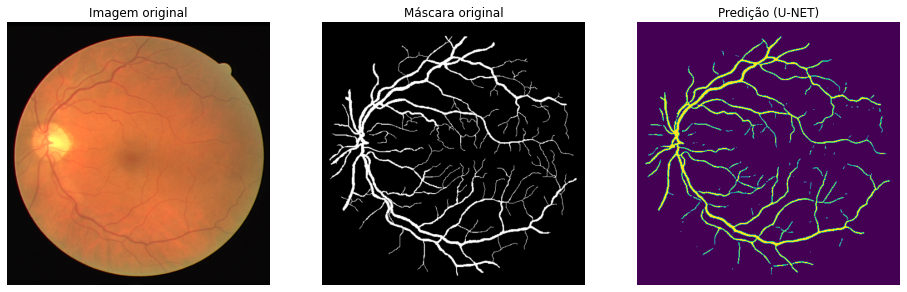

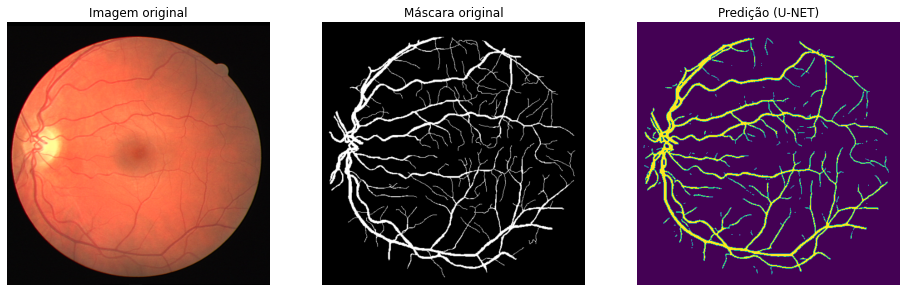

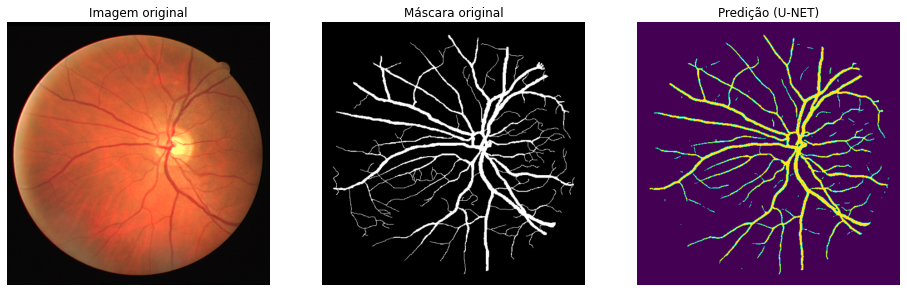

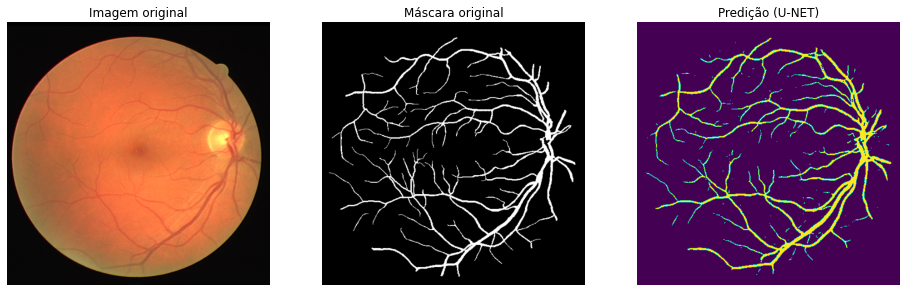

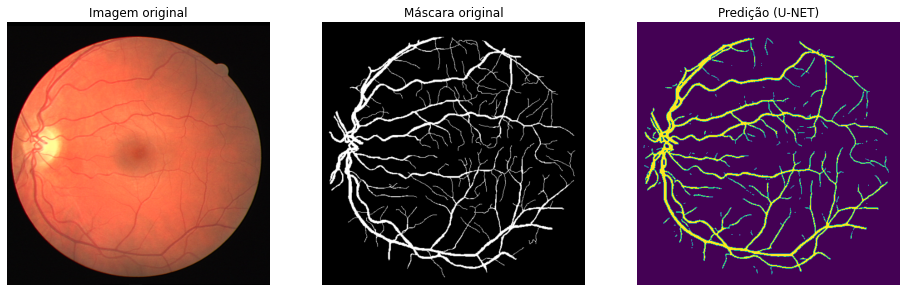

In [ ]:
# Dificuldade em segmentar os contornos mais finos
# Devido ao treino em poucas epocas. Conseguiu segmentar bem os detalhes maiores da imagem
for id in lista_teste:
  img, img_or = ler_img(test_imgs[id])
  mask, mask_or = ler_mask(test_masks[id])
  predicao = segmentar_imagem(img, model)

  fig = plt.figure(figsize=(16,8))
  fig.add_subplot(1,3,1)
  plt.imshow(cv2.cvtColor(img_or, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title('Imagem original')

  plt.subplot(1,3,2)
  plt.imshow(cv2.cvtColor(mask_or, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title('Máscara original')

  plt.subplot(1,3,3)
  plt.imshow(predicao)
  plt.axis('off')
  plt.title('Predição (U-NET)')

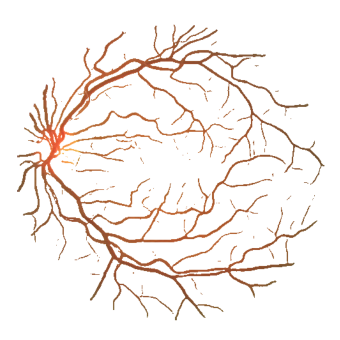

In [ ]:
id = 0
img, img_or = ler_img(test_imgs[id])
mask, mask_or = ler_mask(test_masks[id])
predicao = segmentar_imagem(img, model)

altura, largura = img.shape[:2]
fundo = 255 * np.ones((altura, largura, 3), dtype = 'uint8')
img_final = img_or.copy()
img_final[predicao == 0] = fundo[predicao == 0]

plt.figure(figsize = (6,6))
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.axis('off');

**Avaliação da rede**

In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import MeanIoU

In [ ]:
id = 0
img, img_or = ler_img(test_imgs[id])
mask, mask_or = ler_mask(test_masks[id])
predicao = segmentar_imagem(img, model)

In [ ]:
# Transformando em vetores
pred_ = predicao.flatten()
mask_ = mask.flatten()

In [ ]:
iou = MeanIoU(num_classes = 2)
iou.update_state(mask, predicao)
valor_iou = iou.result().numpy()

In [ ]:
valor_acc = accuracy_score(mask_, pred_)

IoU:  0.7293335
Accuracy:  0.9523811340332031


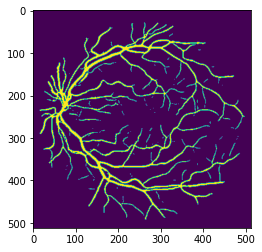

In [ ]:
# IoU mais confiavel que o accuracy neste caso, pois, existem mais pixels do fundo do que pixels de objeto
plt.imshow(predicao)
print('IoU: ', valor_iou)
print('Accuracy: ', valor_acc)

In [ ]:
lista_scores = []

for x, y in tqdm(zip(test_imgs, test_masks), total = len(test_imgs)):
  nome = x.split('/')[-1].split('.')[0]

  img, img_or = ler_img(x)
  mask, mask_or = ler_mask(y)
  predicao = segmentar_imagem(img, model)

  pred_ = predicao.flatten()
  mask_ = mask.flatten()

  iou = MeanIoU(num_classes = 2)
  iou.update_state(mask, predicao)
  valor_iou = iou.result().numpy()

  valor_acc = accuracy_score(mask_, pred_)

  lista_scores.append([nome, valor_iou, valor_acc])

medias_score = [s[1:] for s in lista_scores]
medias_score = np.mean(medias_score, axis = 0)
print()
print(f'Média IoU: {medias_score[0]:0.5f}')
print(f'Média Accuracy: {medias_score[1]:0.5f}')

100%|██████████| 20/20 [00:03<00:00,  5.33it/s]


Média IoU: 0.75814
Média Accuracy: 0.96216
